## Supplementary notebook for Size matters: An analytical study of the role of tissue size in spatiotemporal distribution of morphogens unveils a transition between different Reaction-Diffusion regimes.
### Alberto S. Ceccarelli <sup>1</sup> , Augusto Borges <sup>1, 2, 3</sup> & Osvaldo Chara <sup>1,4,5</sup>
##### 1 Systems Biology Group, Institute of Physics of Liquids and Biological Systems, National Scientific and Technical Research Council, University of La Plata, La Plata, Argentina.
##### 2 Research Unit of Sensory Biology & Organogenesis, Helmholtz Zentrum München, Munich, Germany.
##### 3 Graduate School of Quantitative Biosciences (QBM), Munich, Germany.
##### 4 Center for Information Services and High Performance Computing, Technische Universität Dresden, Dresden, Germany.
##### 5 Instituto de Tecnología, Universidad Argentina de la Empresa (UADE), Buenos Aires, Argentina.
##### *Corresponding author:
##### Osvaldo Chara
##### Center for Information Services and High Performance Computing (ZIH), Technische Universität Dresden, Nöthnitzer Straße 46, 01187 Dresden, Germany. Tel. +49 351 463-38780, E-mail: osvaldo.chara@tu-dresden.de
##### Systems Biology Group (SysBio), Institute of Physics of Liquids and Biological Systems (IFLySIB), National Scientific and Technical Research Council (CONICET) and University of La Plata, Calle 59 N 789, 1900 La Plata, Argentina. Tel. +54 221 4233283 Ext: 26, E-mail: ochara@iflysib.unlp.edu.ar Web: http://sysbioiflysib.wordpress.com/

## The next cell plots fig 4 from the paper.
#### Run the following cell to plot fig 4a from the paper and to save it as a png image.
##### Expected computational time: arround 36 hours.

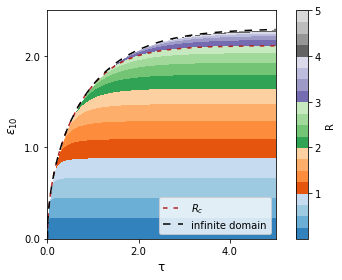

My program took 79300.28396606445 seconds to run


In [12]:
# Import libraries.
import numpy as np
from numpy import pi,cos,exp,sqrt
from scipy.special import erf
import scipy as sp
import matplotlib.pyplot as plt
from scipy import special
from scipy.optimize import brentq
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import time

# A timer that calculates how much does the simulation take.
start_time = time.time()
# Define functions.
# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j,R):
    return (j+1/2)*pi/R
# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j,R):
    return np.cos(aux(j,R)*x)*(1/(aux(j,R)**2+1))*(np.exp(-((((aux(j,R))**2)+1)*t)))
# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def c_finite(x,t,j,R):
    return (-2/R)*sum(aux2(x,t,j,R))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))
# This function calculates the morphogen concentration in an infinite tissue at the steady state using the analytic 
# solution previously reported.
def ss_infinite(x):
    return np.exp(-x)
# This is an auxiliary function that will be used when calculatingthe morphogen concentration in an infinite tissue 
# using the analytic solution previously reported.
def aux3(x,t):
    if (t == 0):
        return 0
    else:
        return 1-(1/2)*special.erfc(np.sqrt(t)-x/(2*np.sqrt(t)))-(1/2)*np.exp(2*x)*special.erfc(np.sqrt(t)+x/(2*np.sqrt(t)))
# This function calculates the morphogen concentration in an infinite tissue using the analytic solution previously 
# reported.
def c_infinite(x,t):
    return ss_infinite(x)*aux3(x,t)
# Calculates C(ε=O,τ)/10-C(ε=x,τ) for a position x for a finite tissue at time τ.
def distance(x,t,R):
    return c_finite(0,t,j,R)/10-c_finite(x,t,j,R)
# Find the minimun of the previuos function.
def minimum_distance(t, R):
    return sp.optimize.brentq(distance, 0, R, args = (t,R))
# Calculates Rcrit for an infinite domain at time t.
def e10_infinite_domain(t):
#     Define necesary arrays and variables.
    R=10
    xi_all = np.arange(0,R,0.001)
    distancia = []
    posible_distance= []
#     Loop over every position.
    for xi in xi_all:
#         Calculate C(ε=O,τ)/10-C(ε=xi,τ) for a position xi for a finite tissue at time τ.
        posible_distance.append(np.absolute(c_infinite(0,t)/10-c_infinite(xi,t)))  
#     Returns the minimum of the previous function.
    return np.argmin(posible_distance)/1000
# Define arrays needed for the simulation.
carr = []
xarr = []
rarr = []
S=1
j = np.arange(0,5000,1)
steps = 1000
maxtime = 2.5
dr=0.001
lengths = np.arange(dr, 5+dr,  dr)
maxr = max(lengths)
times = np.arange(0, maxr + maxr/steps, maxr/steps)
matrix = np.empty((steps+1, len(times)))
matrix[:]=np.nan
r33pos = []
r33c = []
infinitC = []
infinitPos = []
# Loop over every position.
for t in times:
#     Find the value of tau in the matrix.   
    infinitPos.append(int(np.where(times==t)[0]))
#     Find the value of epsilon10 and reshape it with the matrix size
    infinitC.append(e10_infinite_domain(t)*steps/maxtime)   
# Loop over every length.
for r in lengths:
#     Loop over every time.
    for t in times:
#         Find the value of epsilon10.
        carr = minimum_distance(t, r)
#         Find the value of tau.
        where = int(carr*steps/maxtime)
#         Add R to the matrix.
        matrix[where, np.where(times==t)] = r
#         Calculates epsilon 10 for Rcrit.
        if r == 3 and carr != -1:
#             Find the value of tau in the matrix.
            r33pos.append(int(np.where(times==t)[0]))
#             Find the value of epsilon10 in the matrix.    
            r33c.append(where)
# Define auxiliary arrays.
xaxis = np.arange(0, maxr+1, 2)
caxis = np.arange(0, maxtime+0.5, 2*maxtime/5)
caxis1 = np.arange(0, steps+1, 2*steps/5)
caxis= np.round(caxis, 2)
# Creates custom colormap for the heatmap.
vmax = 10.0
#cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightcoral'),
#                                                    (0.5 / vmax, 'firebrick'),
#                                                    (1 / vmax, 'darkkhaki'),
#                                                    (1.5 / vmax, 'olivedrab'),
#                                                    (2 / vmax, 'lightsteelblue'),
#                                                    (2.5 / vmax, 'royalblue'),
#                                                    (3.3 / vmax, 'midnightblue'),
#                                                    (4 / vmax, 'lightgrey'),
#                                                    (10 / vmax, 'dimgrey')]
 #                                       )

# Creates heatmap.
plt.clf()
plt.imshow(matrix, origin="lower",cmap = cm.tab20c)
plt.yticks(caxis1, caxis)
plt.xticks(caxis1, xaxis)
plt.xlabel("τ",fontsize= 12)
plt.ylabel(r"$\epsilon_{10}$",fontsize= 12)
# Adds epsilon10 for Rcrit as a dotted line.
plt.plot(r33pos, r33c, color="firebrick", ls="--", dashes=(3, 4), label="$R_{c}$")
# Adds epsilon10 for an infinite domain as a dashed line.
plt.plot(infinitPos, infinitC, color="black", ls="--", dashes=(5, 5), label="infinite domain")
cbar = plt.colorbar()
plt.legend(loc=4, prop={'size': 10})
cbar.set_label("R")

# Saves the figure.
plt.tight_layout()
plt.savefig("fig4a.png", dpi=500)
plt.show()
plt.close()
# Shows on screen how long the program took to run.
print("My program took "+str(time.time() - start_time)+" seconds to run")

## The next cell plots fig 4 from the paper.
#### Run the following cell to plot fig 4b from the paper and to save it as a png image.
##### Expected computational time: arround 36 hours.

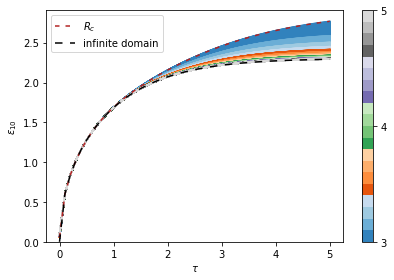

My program took 90.07005310058594 seconds to run


In [4]:
# Import libraries.
import numpy as np
from scipy.special import erf
import scipy as sp
import matplotlib.pyplot as plt
from scipy import special
from scipy.optimize import brentq
import matplotlib.colors as mplc
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import time

# A timer that calculates how much does the simulation take.
start_time = time.time()

# A timer that calculates how much does the simulation take.
# Define functions.
# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def css(x, R):
    return np.cosh(R-x)/np.sinh(R)   

def aux(j,R):
    return (j*np.pi)/R
# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j,R):
    return np.cos(aux(j,R)*x)*(1/(aux(j,R)**2+1))*(np.exp(-((((aux(j,R))**2)+1)*t)))
    # return (2/R)*(np.cos(jbar(j)*x))/((jbar(j)**2+1)**2)*np.exp(-)
# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
# def c_finite(x,t,j):
#     return (-2/R)*sum(aux2(x,t,j))-(np.exp(-x)/(np.exp(-2*R)-1)+np.exp(x)/(1-np.exp(2*R)))
def c_finite(x,t,j,R):
    return -(2/R)*sum(aux2(x,t,j,R))+css(x, R)-np.exp(-t)/R
# This function calculates the morphogen concentration in an infinite tissue at the steady state using the analytic 
# solution previously reported.
def ss_infinite(x):
    return np.exp(-x)
# This is an auxiliary function that will be used when calculatingthe morphogen concentration in an infinite tissue 
# using the analytic solution previously reported.
def aux3(x,t):
    if (t == 0):
        return 0
    else:
        return 1-(1/2)*special.erfc(np.sqrt(t)-x/(2*np.sqrt(t)))-(1/2)*np.exp(2*x)*special.erfc(np.sqrt(t)+x/(2*np.sqrt(t)))
# This function calculates the morphogen concentration in an infinite tissue using the analytic solution previously 
# reported.
def c_infinite(x,t):
    return ss_infinite(x)*aux3(x,t)
# Calculates C(ε=O,τ)/10-C(ε=x,τ) for a position x for a finite tissue at time τ.
def distance(x,t,R):
    return c_finite(0,t,j,R)/10-c_finite(x,t,j,R)
# Find the minimun of the previuos function.
def minimum_distance(t, R):
    try:
        return sp.optimize.brentq(distance, 0, R, args = (t,R))
    except ValueError:
        return -1
# Calculates Rcrit for an infinite domain at time t.
def e10_infinite_domain(t):
#     Define necesary arrays and variables.
    R=10
    xi_all = np.arange(0,R,0.001)
    distancia = []
    posible_distance= []
#     Loop over every position.
    for xi in xi_all:
#         Calculate C(ε=O,τ)/10-C(ε=xi,τ) for a position xi for a finite tissue at time τ.
        posible_distance.append(np.absolute(c_infinite(0,t)/10-c_infinite(xi,t)))  
#     Returns the minimum of the previous function.
    return np.argmin(posible_distance)/1000

# Define variables and arrays needed to perform the simulation
j = np.arange(1,100,1)

dr=0.001

lengths = np.arange(3, 5+dr,  dr)

maxr = round(max(lengths))

times = np.arange(0, 5+0.1, 0.1)

colors = plt.cm.tab20c(np.linspace(0, 1, len(lengths)))

# Loop over all lengths and plot

for r in lengths:
    plt.plot(times, [minimum_distance(t, r) for t in times], color=colors[np.where(lengths == r)])

#     Plot the infinite solution
    
plt.plot(times, [minimum_distance(t, 3) for t in times], color="firebrick", ls="--", dashes=(3, 4), label="$R_{c}$")
plt.plot(times, [e10_infinite_domain(t) for t in times], color="black", ls="--", dashes=(5, 5), label="infinite domain")

# Add the colorbar and set properties of the plot such as the axis label and save the figure.

sm = plt.cm.ScalarMappable(cmap="tab20c", norm=plt.Normalize(vmin=lengths[0], vmax=lengths[-1]))
cbar = plt.colorbar(sm)
cbar.set_ticks([3, 4, 5])

plt.legend()

plt.ylim(0)

plt.xlabel(r"$\tau$")
plt.ylabel(r"$\epsilon_{10}$")

plt.tight_layout()
plt.savefig("fig4b.png", dpi=500)
plt.show()
# Shows on screen how long the program took to run.
print("My program took "+str(time.time() - start_time)+" seconds to run")